# 决策树
---
包含 根节点, 叶节点

**输入:** 训练集: $ D = {(x1, y1),(x2,y2)} $

        属性集 $ A = {a1, a2, ad}$
        属性的意思是总共包含多少种特性(色泽,根菧,敲声)
        训练集是 要训练树的节点的训练集

In [1]:
import numpy as np
import math

In [2]:
class decision_tree(object):
    def __init__(self):
        self.node = 'None'
        self.classes = 'None'
    
    def setNode(self, node ,type, classes):
        
        
    def TreeGenerate(self, D, A):
        node = 0
        class_C = 1
        labels = D[:, 1].T
        if np.sum(labels == class_C) == len(labels):  # 求和判断是否全都是True 
            node = class_C
            
        elif len(A) == 0 or np.sum([label==labels[0] for label in labels]) == len(labels): # 如果属性为空, 或者 所有的样本 在属性中取值相同, 
            
            
        
D = np.array([[1,1], [2,2], [3,3]])
A = np.array([2,2,2])
TreeGenerate(D,A)


IndentationError: expected an indented block (<ipython-input-2-3a1f927d9ff4>, line 9)

In [3]:
D = np.array([[1,1], [2,2], [3,3]])
labels = D[:, 1].T  


### 信息增益
--- 
* 信息熵:  $ Ent(D) = -\sum_{k=0}^{|y|}p_klog_2p_k $

设定: $p = 0, plog_2p = 0$

D样本中 第*k*类样本 所占样本比例为 $p_k, (k = 1,2,...|y|) $ , Ent(D) 的值越小 , D纯度越高, 

* $D^v$ 表示 $a_k 的属性中包含多个可能取值 \lbrace a^1,a^2,...,a^V \rbrace,$ , 就是第 $x^{(i)}属性中有多个 3,4,5,6 的取值$
 有多少个属性值 {色泽,敲声,纹理}, {色泽} 可能取值有3个 {青色, 白色, 乌黑}, $D^1 (色泽=青色), D^2 (色泽=白色), D^3(色泽= 乌黑)$

* 分支点权重: $\frac{|D^v|}{|D|}$
* 信息增益: $Gain(D,a) = Ent(D) - \sum_{v=1}^V\frac{|D^v|}{|D|}Ent(D^v)$
可以用"信息增益" 作为决策树的划分属性选择 即: 从A中选择最优化分属性$a_*^v = argmax_{a\in A}$
* 增益率: '信息增益准则'对可取数目较多的属性有所偏好, 为减少这种问题,使用"增益率" 代替"信息增益"
$Gain\_ratio(D,a) = \frac {Gain(D,a)} {IV(a)},  

其中, a的'固有值'  IV(a) = -\sum_{v=1}^V \frac{|D^v|}{|D|}log_2\frac{|D^v|}{|D|} $

使用方法: 先找到"信息增益"高于平均水平的属性, 在通过"增益率"选择最高的

In [4]:
# 计算信息熵
p = []
Ent_D = sum([ p[feature] * math.log2(p[feature])for feature in range(len(Y))])
weight_inform = 
def Gain_inform(D, a):
    # V 是 不同a 属性的 可取值范围
    g_a = Ent_D - sum([ len()for value in range(len(V))])

# 判断D^1 的

SyntaxError: invalid syntax (<ipython-input-4-2081c45f33c8>, line 4)

* 基尼指数 $Gini(D) = \sum_{k=1}^{|y|}\sum_{k\prime \not= k}p_k p_k{\prime} = 1 - \sum_{k=1}^{|y|}p_k^2$ 

随机抽取两个样本, 类别标记不一样的概率. Gini(D) 越小,纯度越高, '基尼指数'也是用于划分最优属性的 

$ Gini\_index(D,a) = \sum_{v=1}^V\frac{|D^v|}{|D|} Gini(D^v)$
最优属性 $a_* = argmin_{a \in A} Gini\_index(D,a)$

* 剪枝处理,对付过拟合

---
## 简易实现决策树
---
使用鸢尾花数据集:
 1. 导入数据x,y 使用两个 特征进行分类
 2. 数据可视化
 3. 进行分类

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn import datasets
iris = datasets.load_iris()  
''' ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
'''
x = iris.data[:, 2:]   # 使用 petal length 和 petal width 
y = iris.target

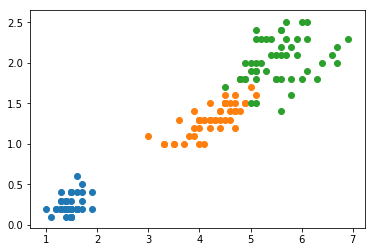

In [7]:
# 数据可视化
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==2,0], x[y==2,1])
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy') # criterion='gini' 也可以使用基尼系数进行划分
dt_clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
# 绘制决策边界
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1], int((axis[1]-axis[0])*100)).reshape
    )

## 构建决策树
---
* 问题: 
    1. 每个节点在哪个维度做划分, 
    2. 某个维度在哪个阈值做划分
    
### 信息熵
熵越大,不确定性越高. 反之,不确定越低

计算公式: $H = - \sum_{i=1}^kp_ilogp_i $   

$由于p_i小于1,则logp_i小于0 $ 
  

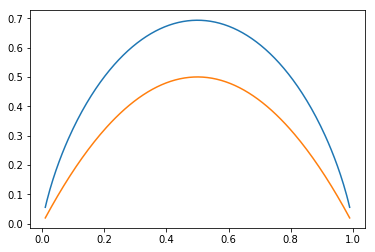

In [10]:
# 信息熵 2分类展示
import math 
def entropy(p):
#     if len(p) is 2:
    Ent_D = (-p * np.log(p) - (1-p) * np.log(1-p))
    Gini_D =  - 2 * p**2 + 2 * p 
    return Ent_D, Gini_D
x = np.linspace(0.01, 0.99, 200)
Ent, Gini = entropy(x)
plt.plot(x, Ent)
plt.plot(x, Gini)
plt.show()
    

### 使用信息熵寻找最优划分

1. 划分X, y , d, 
#### 信息熵 与 基尼系数
1. 信息熵的计算比基尼系数慢,  信息熵有log 


In [18]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)  # bool 值
    return X[index_a], X[index_b], y[index_a], y[index_b]

def entropy(y):
    counter = Counter(y) # Counter({0: 50, 1: 50, 2: 50}), key 是样本, value是个数
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        # 计算信息熵函数
        res += -p * log(p)
    return res
    
    
    
# 寻找 d 和 value
def try_split(X, y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d]) # 把 d 维度中的数据维度进行排列
        for i in range(1, len(X)):
            if X[sorted_index[i - 1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i - 1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

            
        
X = iris.data[:, 2:]
y = iris.target
test = np.argsort(X[:,1])
try_split(X, y)

(0.6931471805599453, 0, 2.45)

### Gini系数
基尼系数

In [21]:

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)  # bool 值
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y) # Counter({0: 50, 1: 50, 2: 50}), key 是样本, value是个数
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        # 计算信息熵函数
        res -= p**2
    return res
    
    
    
# 寻找 d 和 value
def try_split(X, y):
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d]) # 把 d 维度中的数据维度进行排列
        for i in range(1, len(X)):
            if X[sorted_index[i - 1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i - 1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = gini(y_l) + gini(y_r)
                if e < best_g:
                    best_g, best_d, best_v = e, d, v
    return best_g, best_d, best_v

X = iris.data[:, 2:]
y = iris.target
test = np.argsort(X[:,1])
try_split(X, y)     

(0.5, 0, 2.45)

### CART 
Classifiction And Regression Tree 

CART 实现的是二叉树, 还有其他的决策树: ID3, C4.5 C5.0 

$ 预测时间复杂度  O(logm), 训练过程的复杂度O(n*m*logm) $

决策树的问题: 非常容易产生过拟合, 所以要进行 '剪枝', 

参数: max_depth 决策树深度, 
    
    min_samples_split 一个节点至少有多少个样本继续进行拆分下去  
    
    min_samples_leaf 对于一个叶,至少要有几个节点
    
    max_leaf_nodes  最多有多少个叶子节点, 
      

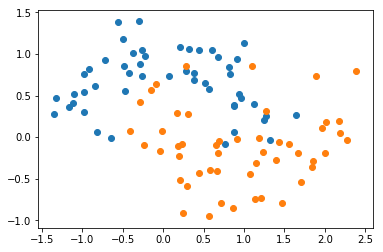

In [24]:
from sklearn import datasets
X, y = datasets.make_moons(noise=0.25, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [25]:
# 进行决策树处理
from s

SyntaxError: invalid syntax (<ipython-input-25-d4258fb4b48a>, line 2)

### 决策树实现回归问题

